#### Defined custom loss function
#### Added ReLU after BN
#### Saved best weights and loaded it and max was 99.5

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import keras
from keras.regularizers import l2
from keras import regularizers
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


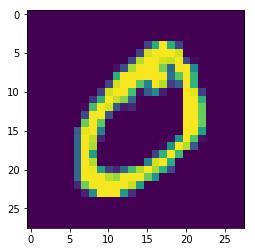

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])
print(X_train.shape[3])

60000
28
28
1


In [7]:
X_train[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980395],
       [0.7176471 ],
       [0.99215686],
       [0.99215686],
       [0.8117647 ],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(),X_train.std(),X_test.mean(),X_test.std()))

Statistics train=0.131 (0.308), test=0.133 (0.310)


#### Pixel stretch and mean subtraction and std division.

In [10]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean,datagen.std))
# calculate the mean on the test dataset
datagen.fit(X_test)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean,datagen.std))

Data Generator mean=0.131, std=0.308
Data Generator mean=0.133, std=0.310


#### Given batch size images for datagen object.
#### It will iterate for next next images.

In [11]:
# demonstrate effect on a single batch of samples
train_generator = datagen.flow(X_train,Y_train,batch_size=128,shuffle=False)
batchX, batchy = train_generator.next()
print(batchX.shape,batchX.mean(),batchX.std())

(128, 28, 28, 1) -0.016303241 0.9803502


In [12]:
# demonstrate effect on entire training dataset
test_generator = datagen.flow(X_test,Y_test,batch_size=128,shuffle=False)
batchX, batchy = test_generator.next()
print(batchX.shape,batchX.mean(),batchX.std())

(128, 28, 28, 1) -0.045750923 0.94554704


In [13]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#### Same 8th code 
#### Added ReLU after Batch Normalization

#### Batch Normalization : Channels wise it will calculate mean,variance, gamma(dont know the exact name) and beta

### This gamma and beta is used to adjust to the images.

In [14]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1)) #22
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [15]:
# For retrieving the saved best results
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Defining checkpoints
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/Raajesh-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [17]:
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
import keras

#### DEFINING CUSTOM LOSS FUNCTION

-  Here we have squared the weights (kernel values) and summed it up and it is because we are doing L2 Regularizer.
-   Multiplying it with Regularization parameter (lamdba) and dividing it by 2xm and (m is the number of images - 128batchsize).
-   To add it to the cost function, we are calling this categorical_crossentropy (that will calculate default cost function) and passing this calculated results.

In [0]:
def customloss(Y_test,y_pred):
  weights = 0
  for layers in model.layers:
    #print(np.sum(np.sum(np.sum(np.square(layers.get_weights())))))
    weights = weights + np.sum(np.sum(np.sum(np.square(layers.get_weights()))))
  
  print(weights)
  lambdaval = 1e-4
  y_true = y_test
  l2regularization = ( lambdaval/(2*128) ) + weights
  loss = keras.losses.categorical_crossentropy(Y_test,y_pred) + l2regularization
  return loss


In [20]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

callbacks_list.append(LearningRateScheduler(scheduler, verbose=1))

model.compile(loss=customloss, optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch=np.ceil(60000/128),
        epochs=40,
        validation_data=test_generator,
        callbacks=callbacks_list,
        validation_steps=np.ceil(10000/128)) 

335.4030599594116
Instructions for updating:
Use tf.cast instead.
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 10s 22ms/step - loss: 335.6355 - acc: 0.9275 - val_loss: 335.4653 - val_acc: 0.9794

Epoch 00001: val_acc improved from -inf to 0.97940, saving model to /content/gdrive/My Drive/Raajesh-01-0.98.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 8s 16ms/step - loss: 335.4674 - acc: 0.9805 - val_loss: 335.4419 - val_acc: 0.9862

Epoch 00002: val_acc improved from 0.97940 to 0.98620, saving model to /content/gdrive/My Drive/Raajesh-02-0.99.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 8s 17ms/step - loss: 335.4504 - acc: 0.9854 - val_loss: 335.4369 - val_acc: 0.9889

Epoch 00003: val_acc improved from 0.98620 to 0.98890, saving model to

In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-28-0.99.hdf5')

In [0]:
score = model.evaluate_generator(test_generator,steps=np.ceil(10000/128))

In [23]:
#score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[335.4220359375, 0.995]


In [24]:
count = model.predict_generator(test_generator,np.ceil(10000/128))
print(count.shape)

(10000, 10)


In [0]:
predicted_classes = model.predict_classes(X_test)

In [26]:
print(predicted_classes)
print(len(predicted_classes))

[7 2 1 ... 4 0 6]
10000


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [0]:
correct = np.nonzero(predicted_classes==y_test)

In [30]:
print(correct)
print(len(correct))

(array([   0,    1,    2, ..., 9996, 9997, 9999]),)
1


In [0]:
incorrect = np.nonzero(predicted_classes!=y_test)

In [32]:
print(incorrect)
print(len(incorrect))

(array([   7,    8,   18, ..., 9982, 9986, 9998]),)
1


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [34]:
print(incorrect[0:9])

(array([   7,    8,   18, ..., 9982, 9986, 9998]),)


In [0]:
arincorr = incorrect[0][0:25]

In [36]:
arincorr

array([  7,   8,  18,  20,  29,  41,  44,  45,  59,  62,  63,  68,  73,
        78,  87,  92,  93,  96, 104, 108, 112, 125, 142, 145, 151])

### I am not able to plot 5x5 using Subplot.
### So i have used subplot2grid to design 5x5 gallery.

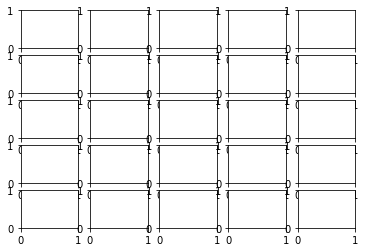

In [120]:
import matplotlib.pyplot as plt

plt.figure(0)
for i in range(5):
    for j in range(5):
        plt.subplot2grid((5,5), (i,j))
plt.show()

### First Loop - For Rows.
### Second Loop - For Columns.

#### Then i am taking the first incorrect image and showing it in the first plot.
#### Then i am titleing it with the respective predicted and target class.

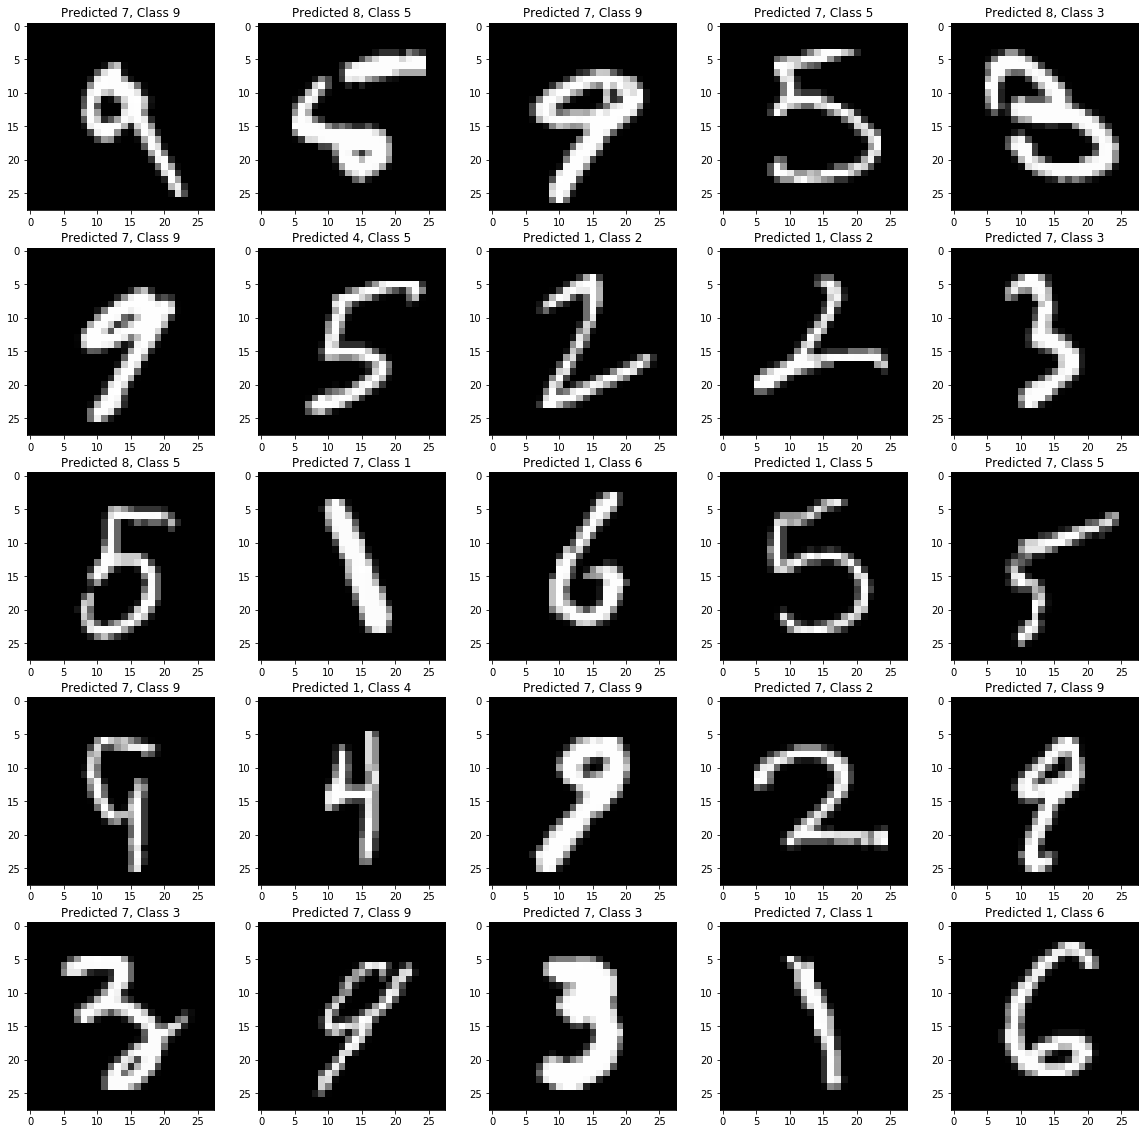

In [121]:
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(0)
plt.figure(figsize = (20,20)) 
plots = []
count = 0
for i in range(5):
    for j in range(5):
        ax = plt.subplot2grid((5,5), (i,j))
        plt.imshow(X_test[arincorr[count]].reshape(28,28),cmap='gray',interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[arincorr[count]], y_test[arincorr[count]]))
        count = count+1
plt.show()